In [36]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *


In [37]:
p_data = "project_data_final.csv"
p_df = pd.read_csv(p_data)
p_df['Date Application Received'] = pd.to_datetime(p_df['Date Application Received'])
#p_df = p_df.sort_values('Date Application Received', ascending=True)
p_df = p_df.drop(columns=['Unnamed: 0'])
#p_df.head()

/Users/dmanandhar/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
#creating column with concatenated year and month
#p_df['Year-Month'] = p_df['Completed Year'].map(str) + "-" + p_df['Completed Month'].map(str)


In [39]:
#create analysis data frames
df = p_df[['Project Number','Sector','Date Application Received','Expected KWh Annual Production']]

residential_df = df.loc[df['Sector'] == 'Residential']
residential_df = residential_df.reset_index()
residential_df = residential_df.drop(columns=['index'])
residential_df = residential_df.sort_values('Date Application Received', ascending=True)

non_residential_df = df.loc[df['Sector'] == 'Non-Residential']
non_residential_df = non_residential_df.reset_index()
non_residential_df = non_residential_df.drop(columns=['index'])
non_residential_df = non_residential_df.sort_values('Date Application Received', ascending=True)

residential_df.head()


,Project Number,Sector,Date Application Received,Expected KWh Annual Production
124,2011-156225-SLPR,Residential,2000-12-21,1409
621,2011-156227-SLPR,Residential,2000-12-21,1409
467,2011-156229-SLPR,Residential,2001-03-07,2113
775,2011-156228-SLPR,Residential,2001-03-07,5165
826,2011-156239-SLPR,Residential,2001-07-02,2582


In [40]:
res_df = residential_df.groupby('Date Application Received').agg({'Date Application Received':'count','Expected KWh Annual Production':['sum']})
res_df = res_df.reset_index()

res_date_count_df = res_df['Date Application Received']
res_date_count_df = res_date_count_df.rename(columns={"":"Date"})
kwh = temp_df['Expected KWh Annual Production']['sum']
res_date_count_df['Total KWh'] = kwh

#date_count_df.to_csv('date_count.csv')
date_count_df.head()


,Date,count,Total KWh
0,2000-12-21,2,2818
1,2001-03-07,2,7278
2,2001-07-02,1,2582
3,2001-08-17,1,2817
4,2001-08-28,2,4695


Text(0.5,1,'Residential Solar Power Generation')

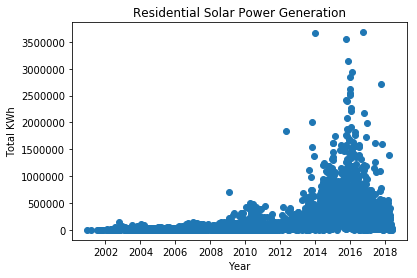

In [49]:
#scat = sns.tsplot(x='Date',y='Total KWh', data=date_count_df,
#                  hue='count', fit_reg=False, size = 5, aspect = 2, 
#                  palette="Set3",
#                  scatter_kws={'edgecolors':'black'})
plt.plot_date(res_date_count_df["Date"], res_date_count_df["Total KWh"], marker="o")
plt.xlabel('Year')
plt.ylabel('Total KWh')
plt.title("Residential Solar Power Generation")
#date_count_df.plot_date

In [42]:
non_res_df = non_residential_df.groupby('Date Application Received').agg({'Date Application Received':'count','Expected KWh Annual Production':['sum']})
non_res_df = non_res_df.reset_index()

non_res_date_count_df = non_res_df['Date Application Received']
non_res_date_count_df = non_res_date_count_df.rename(columns={"":"Date"})
kwh = temp_df['Expected KWh Annual Production']['sum']
non_res_date_count_df['Total KWh'] = kwh

#date_count_df.to_csv('date_count.csv')

Text(0.5,1,'Non-Residential Solar Power Generation')

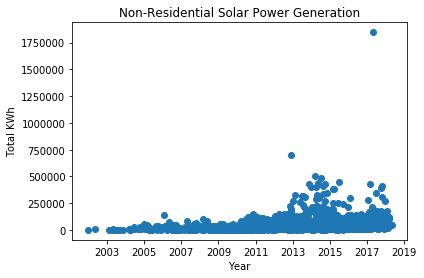

In [50]:
plt.plot_date(non_res_date_count_df["Date"], non_res_date_count_df["Total KWh"], marker="o")
plt.xlabel('Year')
plt.ylabel('Total KWh')
plt.title("Non-Residential Solar Power Generation")

In [48]:
date_count = dude_df['Date Application Received']
date_count = date_count.rename(columns={"":"Date"})
kwh = dude_df['Expected KWh Annual Production']['sum']
date_count['Total KWh'] = kwh
date_count.head()

,Date,count,Total KWh
0,2000-12-21,2,2818
1,2001-03-07,2,7278
2,2001-07-02,1,2582
3,2001-08-17,1,2817
4,2001-08-28,2,4695


In [9]:
residential_project_count_df = residential_df['Date Application Received'].value_counts().to_frame()
residential_project_count_df = residential_project_count_df.reset_index()

residential_project_count_df = residential_project_count_df.rename(columns={'index': 'Date_Application_Received', 'Date Application Received': 'Count'})
residential_project_count_df = residential_project_count_df.sort_values('Date_Application_Received', ascending=True)
residential_project_count_df = residential_project_count_df.reset_index()

residential_project_count_df = residential_project_count_df.drop(columns=['index'])

dates = residential_project_count_df['Date_Application_Received']
y_m = []
for date in dates:
    y_m.append(date.strftime('%Y-%m'))
    
residential_project_count_df['Year-Month'] = y_m
    
print(residential_project_count_df.head())

sorted_residential_project_count_df = residential_project_count_df.groupby('Year-Month').Count.agg(['sum'])
sorted_residential_project_count_df = sorted_residential_project_count_df.reset_index()
print(sorted_residential_project_count_df.head())


  Date_Application_Received  Count Year-Month
0                2000-12-21      2    2000-12
1                2001-03-07      2    2001-03
2                2001-07-02      1    2001-07
3                2001-08-17      1    2001-08
4                2001-08-28      2    2001-08
  Year-Month  sum
0    2000-12    2
1    2001-03    2
2    2001-07    1
3    2001-08    3
4    2001-09    1


In [10]:
non_residential_project_count_df = non_residential_df['Date Application Received'].value_counts().to_frame()
non_residential_project_count_df = non_residential_project_count_df.reset_index()

non_residential_project_count_df = non_residential_project_count_df.rename(columns={'index': 'Date_Application_Received', 'Date Application Received': 'Count'})
non_residential_project_count_df = non_residential_project_count_df.sort_values('Date_Application_Received', ascending=True)
non_residential_project_count_df = non_residential_project_count_df.reset_index()

non_residential_project_count_df = non_residential_project_count_df.drop(columns=['index'])

dates = non_residential_project_count_df['Date_Application_Received']
y_m = []
for date in dates:
    y_m.append(date.strftime('%Y-%m'))

non_residential_project_count_df['Year-Month'] = y_m
print(non_residential_project_count_df.head())

sorted_non_residential_project_count_df = non_residential_project_count_df.groupby('Year-Month').Count.agg(['sum'])
sorted_non_residential_project_count_df = sorted_non_residential_project_count_df.reset_index()

print(sorted_non_residential_project_count_df.head())

  Date_Application_Received  Count Year-Month
0                2001-12-17      1    2001-12
1                2002-05-15      1    2002-05
2                2003-02-04      1    2003-02
3                2003-04-10      2    2003-04
4                2003-05-05      1    2003-05
  Year-Month  sum
0    2001-12    1
1    2002-05    1
2    2003-02    1
3    2003-04    2
4    2003-05    2


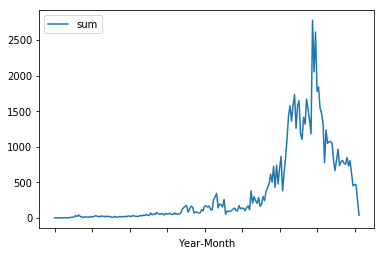

In [13]:
scat = sorted_residential_project_count_df.plot(kind='line', x='Year-Month',y='sum')

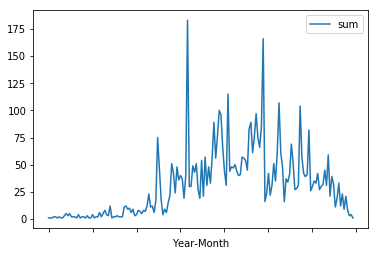

In [14]:
scat = sorted_non_residential_project_count_df.plot(kind='line', x='Year-Month',y='sum')